In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/content/tech_support_dataset.csv')

df.head()

,Conversation_ID,Customer_Issue,Tech_Response,Resolution_Time,Issue_Category,Issue_Status
0,CONV-0001,Cannot connect to Wi-Fi,Clear cache and remove unnecessary programs.,92 minutes,Software,Pending
1,CONV-0002,Software installation failure,Reinstall the printer drivers.,76 minutes,Account,Pending
2,CONV-0003,Cannot connect to Wi-Fi,Clear cache and remove unnecessary programs.,50 minutes,Network,Resolved
3,CONV-0004,Forgot password,Reset your password using the link provided.,97 minutes,Performance,Pending
4,CONV-0005,Software installation failure,Follow the software installation guide.,110 minutes,Performance,Pending


In [5]:
df.tail()

,Conversation_ID,Customer_Issue,Tech_Response,Resolution_Time,Issue_Category,Issue_Status
1891,CONV-1892,Forgot password,Verify your email settings.,95 minutes,Hardware,Escalated
1892,CONV-1893,Software installation failure,Run a system diagnostic tool.,13 minutes,Hardware,Resolved
1893,CONV-1894,Forgot password,Follow the software installation guide.,32 minutes,Network,Resolved
1894,CONV-1895,Blue screen error,Run a system diagnostic tool.,109 minutes,Hardware,Escalated
1895,CONV-1896,Unable to access email,Restart your router.,77 minutes,Network,Resolved after follow-up


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896 entries, 0 to 1895
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Conversation_ID  1896 non-null   object
 1   Customer_Issue   1896 non-null   object
 2   Tech_Response    1896 non-null   object
 3   Resolution_Time  1896 non-null   object
 4   Issue_Category   1896 non-null   object
 5   Issue_Status     1896 non-null   object
dtypes: object(6)
memory usage: 89.0+ KB


In [7]:
df.sample()

,Conversation_ID,Customer_Issue,Tech_Response,Resolution_Time,Issue_Category,Issue_Status
152,CONV-0153,Printer not responding,Restart your router.,85 minutes,Software,Resolved after follow-up


<Axes: >

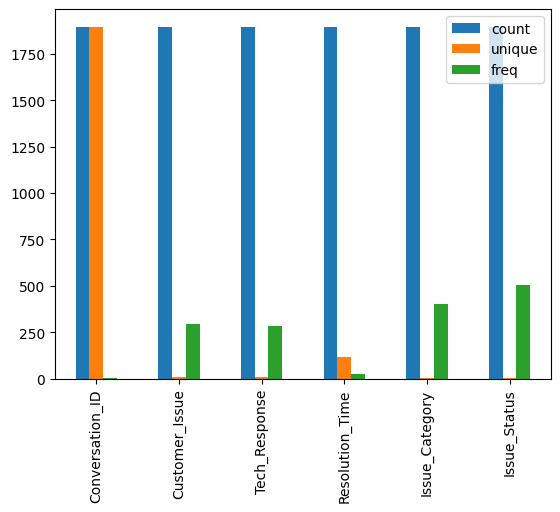

In [8]:
df.describe().T.plot(kind='bar')

In [9]:
df.describe(include = 'all').T

,count,unique,top,freq
Conversation_ID,1896,1896,CONV-0001,1
Customer_Issue,1896,7,Slow system performance,293
Tech_Response,1896,7,Verify your email settings.,285
Resolution_Time,1896,116,56 minutes,26
Issue_Category,1896,5,Hardware,402
Issue_Status,1896,4,Resolved,505


In [10]:
df.duplicated().sum()

0

In [11]:
df.columns.to_list()

['Conversation_ID',
 'Customer_Issue',
 'Tech_Response',
 'Resolution_Time',
 'Issue_Category',
 'Issue_Status']

In [12]:
df.isnull().sum()

,0
Conversation_ID,0
Customer_Issue,0
Tech_Response,0
Resolution_Time,0
Issue_Category,0
Issue_Status,0


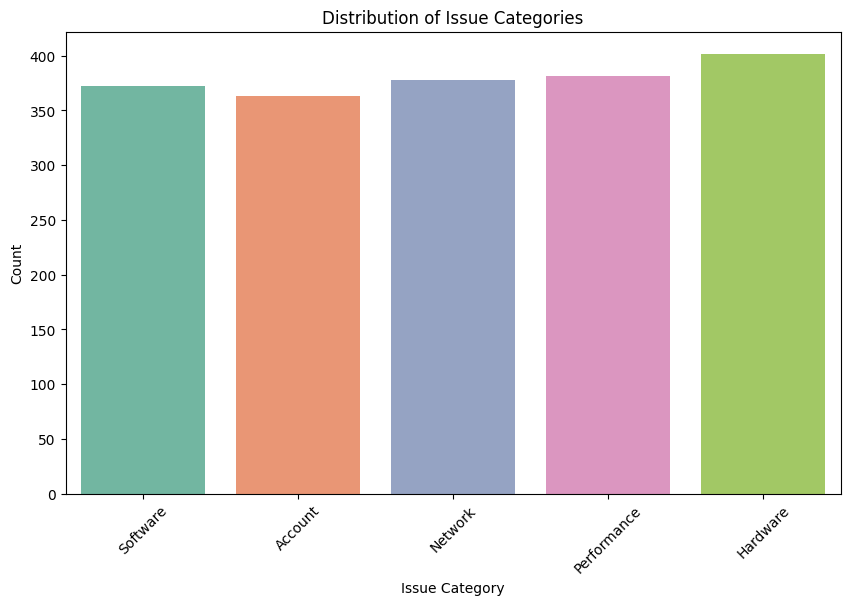

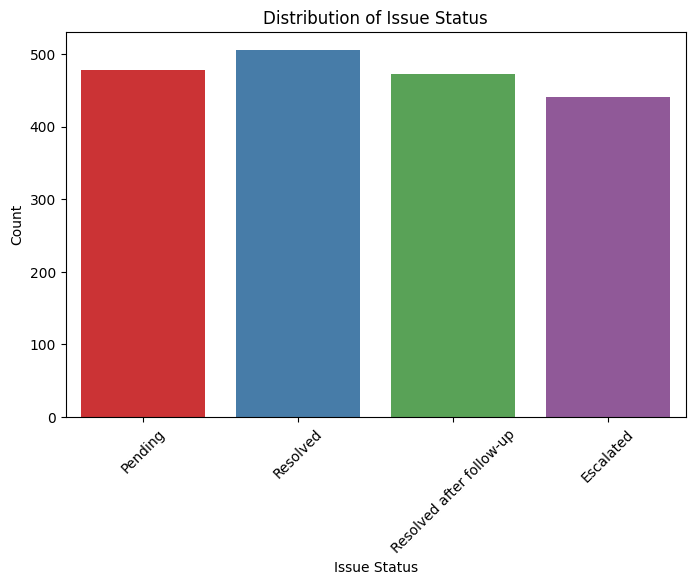

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Issue_Category', palette='Set2')
plt.title('Distribution of Issue Categories')
plt.xlabel('Issue Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Issue_Status', palette='Set1')
plt.title('Distribution of Issue Status')
plt.xlabel('Issue Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

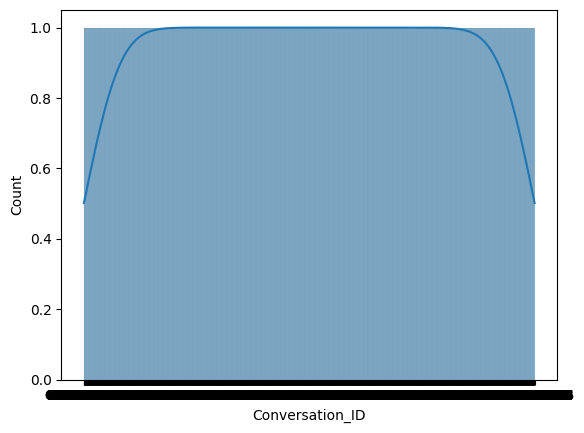

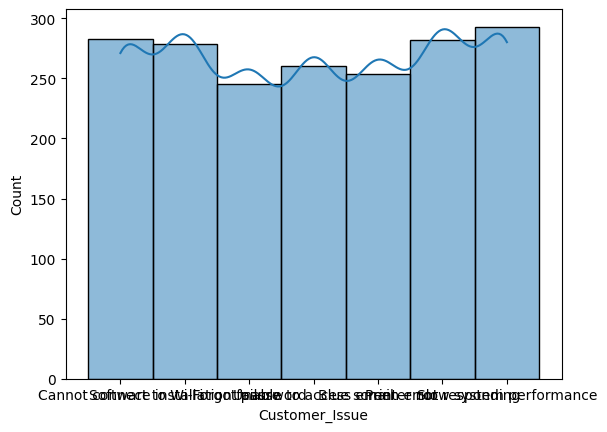

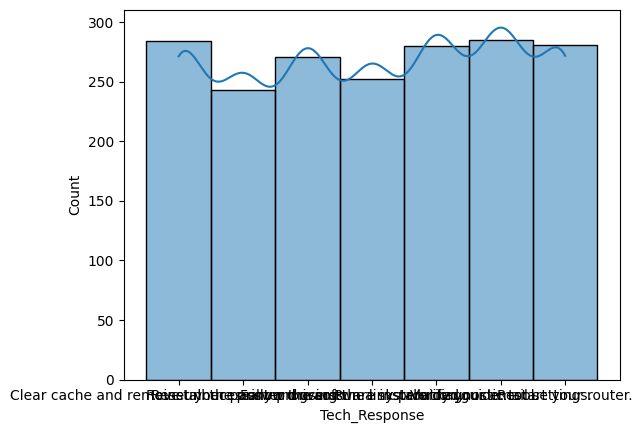

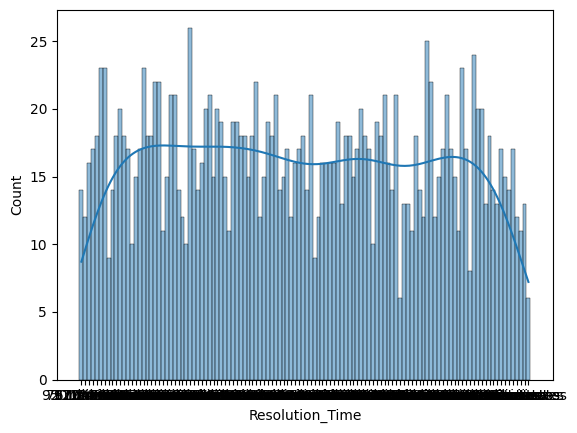

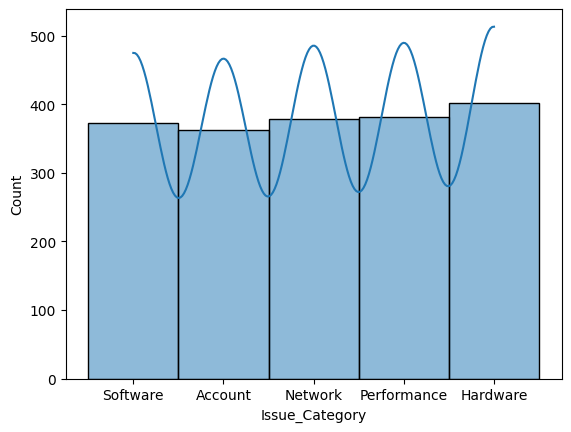

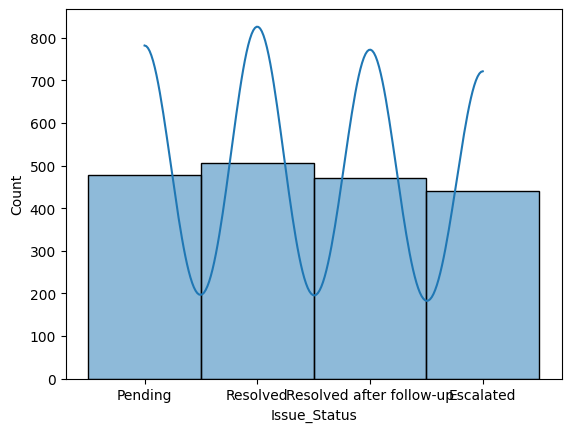

In [15]:
for col in df:
  sns.histplot(x=col, data=df, kde=True)
  plt.show()

In [23]:
import plotly.express as px
import pandas as pd

# Assuming df is already defined and contains the data

# Define the columns you want to plot
columns =['Conversation_ID',
 'Customer_Issue',
 'Tech_Response',
 'Resolution_Time',
 'Issue_Category',
 'Issue_Status']
# Iterate through each column and create a bar chart or histogram
for column in columns:
    try:
        if column not in df.columns:
            print(f"Column {column} does not exist in the DataFrame")
            continue

        # Check if the column is suitable for a bar chart (categorical data)
        if df[column].dtype == 'object' or df[column].dtype.name == 'category':
            # Count the occurrences of each unique value
            column_counts = df[column].value_counts().reset_index()
            column_counts.columns = [column, 'count']

            # Create a bar chart using plotly.express
            fig = px.bar(
                column_counts,
                x=column,
                y='count',
                title=f'Distribution of {column}',
                labels={column: column, 'count': 'Count'},
                text='count'
            )

            # Update layout for better readability
            fig.update_layout(
                xaxis_title=column,
                yaxis_title='Count',
                paper_bgcolor='rgba(0,0,0,0)',
                plot_bgcolor='rgba(0,0,0,0)',
                title_font=dict(size=18, family="Arial"),
                xaxis={'categoryorder': 'total descending'}
            )

            # Show the figure
            fig.show()

        # For numerical data
        elif df[column].dtype in ['int64', 'float64']:
            # Create a histogram for numerical columns
            fig = px.histogram(
                df,
                x=column,
                title=f'Distribution of {column}',
                labels={column: column, 'count': 'Count'}
            )

            # Update layout for better readability
            fig.update_layout(
                xaxis_title=column,
                yaxis_title='Count',
                paper_bgcolor='rgba(0,0,0,0)',
                plot_bgcolor='rgba(0,0,0,0)',
                title_font=dict(size=18, family="Arial")
            )

            # Show the figure
            fig.show()

    except Exception as e:
        print(f"Could not create plot for column {column}: {e}")

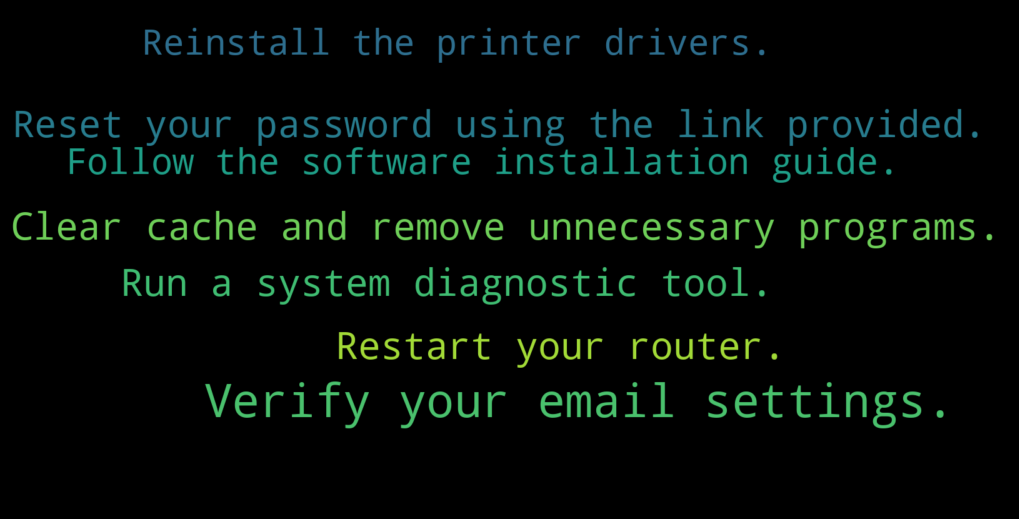

In [26]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import pandas as pd

stop_words_list = set(STOPWORDS)

counts = Counter(df["Tech_Response"].dropna().apply(lambda x: str(x)))

wcc = WordCloud(
    background_color="black",
    width=1600, height=800,
    max_words=2000,
    stopwords=stop_words_list
)
wcc.generate_from_frequencies(counts)

plt.figure(figsize=(10, 5), facecolor='k')
plt.imshow(wcc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [28]:
data=df

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english', lowercase=True, max_features=500)
X = vectorizer.fit_transform(data['Customer_Issue'])

print(f"Feature names from vectorization: {vectorizer.get_feature_names_out()[:10]}")

Feature names from vectorization: ['access' 'blue' 'connect' 'email' 'error' 'failure' 'fi' 'forgot'
 'installation' 'password']


In [32]:
from sklearn.model_selection import train_test_split

X = vectorizer.transform(data['Customer_Issue'])
y = data['Issue_Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (1516, 18)
Test data shape: (380, 18)


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 0.2
Classification Report:
              precision    recall  f1-score   support

     Account       0.21      0.36      0.26        61
    Hardware       0.18      0.39      0.25        74
     Network       0.24      0.17      0.20        78
 Performance       0.19      0.14      0.16        86
    Software       0.00      0.00      0.00        81

    accuracy                           0.20       380
   macro avg       0.16      0.21      0.17       380
weighted avg       0.16      0.20      0.17       380



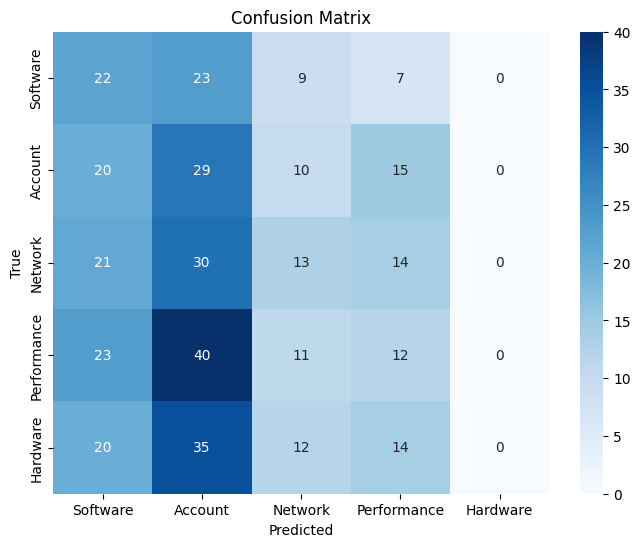

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()